In [2]:

import loader
path_HE = 'C:/Users/phili/OneDrive/Uni/WS_22/Masterarbeit/Masterarbeit_Code_Philipp_Rosin/Data_set_BCI_challange/train/HE_imgs/HE'
path_IHC = 'C:/Users/phili/OneDrive/Uni/WS_22/Masterarbeit/Masterarbeit_Code_Philipp_Rosin/Data_set_BCI_challange/train/IHC_imgs/IHC'

In [6]:
from torch.utils.data import DataLoader
import random
import conv_models
import utils
import eval
import torch
import os
import loader
params = utils.get_config_from_yaml('C:/Users/phili/OneDrive/Uni/WS_22/Masterarbeit/Masterarbeit_Code_Philipp_Rosin/torch_stain_transfer/code/config.yaml')
train_data = loader.stain_transfer_dataset( img_patch= 100,
                                            grayscale = False,
                                            norm = False,
                                            num_epochs = 1,
                                            HE_img_dir = path_HE,
                                            IHC_img_dir = path_IHC,
                                            img_size= [64,64],
                                           )
train_data_loader = DataLoader(train_data, batch_size=1, shuffle=False) 

HE_tensor, HE_tensor_norm, IHC_tensor, IHC_tensor_norm, img_name = next(iter(train_data_loader))

model = conv_models.GeneratorResNet(in_channels= 3,
                                        num_residual_blocks = 9
                                        )
model = model.cuda()

output_folder_path = os.path.join(params['output_path'],params['output_folder'])
model_path = os.path.join(output_folder_path,params['model_name'])
model.load_state_dict(torch.load(model_path))

#HE_tensor, HE_tensor_norm, IHC_tensor, IHC_tensor_norm = next(iter(train_data_loader))

fake_IHC_model = model(HE_tensor)
fake_IHC_model = fake_IHC_model+1
fake_IHC_model = fake_IHC_model*0.5


#fake_IHC = fake_IHC.int()

print(IHC_tensor)


#print( IHC_tensor_norm)

tensor([[[[0.9176, 0.9529, 0.9725,  ..., 0.9686, 0.9412, 0.9176],
          [0.9490, 0.9608, 0.9608,  ..., 0.9451, 0.9216, 0.9020],
          [0.9608, 0.9608, 0.9451,  ..., 0.9569, 0.9451, 0.9373],
          ...,
          [1.0000, 0.9725, 0.9569,  ..., 0.9608, 0.9529, 0.9333],
          [0.9922, 0.9647, 0.9608,  ..., 0.9569, 0.9451, 0.9294],
          [0.9961, 0.9725, 0.9765,  ..., 0.9529, 0.9373, 0.9176]],

         [[0.8824, 0.9176, 0.9373,  ..., 0.9255, 0.8980, 0.8745],
          [0.9137, 0.9255, 0.9255,  ..., 0.9020, 0.8784, 0.8588],
          [0.9255, 0.9255, 0.9098,  ..., 0.9137, 0.9020, 0.8941],
          ...,
          [0.9765, 0.9569, 0.9373,  ..., 0.9098, 0.8980, 0.8902],
          [0.9647, 0.9490, 0.9412,  ..., 0.9059, 0.8902, 0.8863],
          [0.9647, 0.9569, 0.9569,  ..., 0.9020, 0.8824, 0.8745]],

         [[0.8549, 0.8902, 0.9098,  ..., 0.9098, 0.8824, 0.8510],
          [0.8941, 0.8980, 0.8980,  ..., 0.8863, 0.8549, 0.8353],
          [0.9059, 0.8980, 0.8824,  ..., 0

('02220_train_2+.png',)
('02220_train_2+.png',)
('03178_train_2+.png',)
('03178_train_2+.png',)


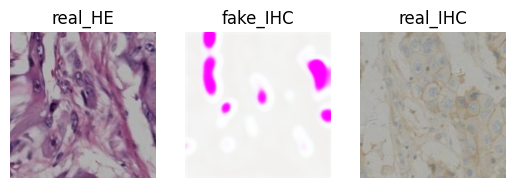

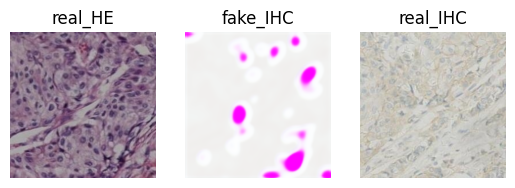

In [1]:
import conv_models
import eval
import utils
params = utils.get_config_from_yaml('C:/Users/phili/OneDrive/Uni/WS_22/Masterarbeit/Masterarbeit_Code_Philipp_Rosin/torch_stain_transfer/code/config.yaml')
gen_test = conv_models.GeneratorResNet(in_channels= 3,
                                           num_residual_blocks = params['num_resnet']

                                           )
gen_test = gen_test.cuda()
model = gen_test

model_testing = eval.test_network(params,model)
model_testing.fit()

[[[0.9887787  0.8688911  0.9427051 ]
  [0.9888234  0.88646334 0.9450621 ]
  [0.98852205 0.90188026 0.9432515 ]
  ...
  [0.99183357 0.98499507 0.9823105 ]
  [0.9895307  0.985808   0.98325366]
  [0.99180794 0.98691833 0.98370206]]

 [[0.9892621  0.8904917  0.9429713 ]
  [0.988793   0.9031708  0.9424038 ]
  [0.9888813  0.91803116 0.9409217 ]
  ...
  [0.9900477  0.9863531  0.9823494 ]
  [0.9870143  0.98677564 0.98321295]
  [0.9906982  0.9874722  0.9835174 ]]

 [[0.98828614 0.90441763 0.94517475]
  [0.98856217 0.918044   0.945591  ]
  [0.98841727 0.92728734 0.9457867 ]
  ...
  [0.99120903 0.9845778  0.982785  ]
  [0.9892081  0.9850932  0.9832883 ]
  [0.99231195 0.98582935 0.98397195]]

 ...

 [[0.9906547  0.9851841  0.9786016 ]
  [0.9896837  0.9845514  0.97592443]
  [0.9906758  0.98431504 0.97559375]
  ...
  [0.9922819  0.98647237 0.97923833]
  [0.9897007  0.9865502  0.9804803 ]
  [0.99127185 0.98685706 0.9803964 ]]

 [[0.9915427  0.9863178  0.98011696]
  [0.99093914 0.9851855  0.97752124]


Text(0.5, 1.0, 'fake_IHC')

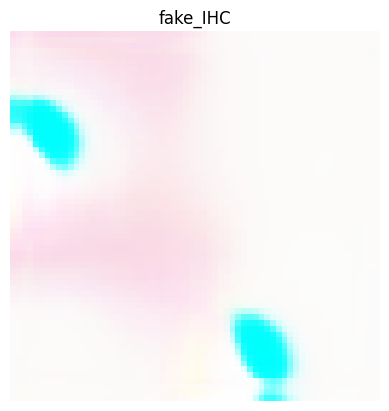

In [5]:
import numpy as np
import matplotlib.pyplot as plt
fake_IHC = np.squeeze(fake_IHC_model)
fake_IHC = fake_IHC.cpu().detach().numpy()
#fake_IHC = fake_IHC.astype(np.uint8)
fake_IHC = np.transpose(fake_IHC, axes=[1,2,0])

print(fake_IHC)
                                        
plt.imshow(fake_IHC )
plt.axis('off')
plt.title('fake_IHC')

In [4]:
import yaml
import matplotlib.pyplot as plt
import numpy as np 
import os
import utils
import conv_models

params = utils.get_config_from_yaml('C:/Users/phili/OneDrive/Uni/WS_22/Masterarbeit/Masterarbeit_Code_Philipp_Rosin/torch_stain_transfer/code/config.yaml')
def plot_img_set(real_HE, real_IHC, fake_IHC, i,params):
    fig_name = 'plot_'+ str(i)+ '.png'

    real_HE = real_HE.cpu().detach().numpy()
    fake_IHC = fake_IHC.cpu().detach().numpy()
    real_IHC = real_IHC.cpu().detach().numpy()

    if params['norm']== True:
        real_HE = real_HE.astype(np.uint8)
        real_IHC = real_IHC.astype(np.uint8)
        fake_IHC = fake_IHC.astype(np.uint8)

    real_HE = np.squeeze(real_HE )
    fake_IHC = np.squeeze(fake_IHC)
    real_IHC = np.squeeze(real_IHC )

    real_HE = np.transpose(real_HE, axes=[1,2,0])
    fake_IHC = np.transpose(fake_IHC, axes=[1,2,0])
    real_IHC = np.transpose(real_IHC, axes=[1,2,0])

    fig = plt.figure()
    fig.add_subplot(1, 3, 1)       
    plt.imshow(real_HE )
    plt.axis('off')
    plt.title('real_HE')


    fig.add_subplot(1, 3, 2)       
    plt.imshow(fake_IHC )
    plt.axis('off')
    plt.title('fake_IHC')
            

    fig.add_subplot(1, 3, 3)    
    plt.imshow(real_IHC )
    plt.axis('off')
    plt.title('real_IHC')

    fig.savefig(os.path.join(os.path.join(params['output_path'],params['output_folder']),fig_name))

model = conv_models.GeneratorResNet(in_channels= 3,
                                        num_residual_blocks = 6
                                        )
model = model.cuda()



In [5]:
import conv_models
import utils
import eval
import torch

params = utils.get_config_from_yaml('C:/Users/phili/OneDrive/Uni/WS_22/Masterarbeit/Masterarbeit_Code_Philipp_Rosin/torch_stain_transfer/code/config.yaml')

model = conv_models.GeneratorResNet(in_channels= 3,
                                        num_residual_blocks = 6
                                        )
model = model.cuda()

output_folder_path = os.path.join(params['output_path'],params['output_folder'])
model_path = os.path.join(output_folder_path,params['model_name'])
model.load_state_dict(torch.load(model_path))
HE_tensor, HE_tensor_norm, IHC_tensor, IHC_tensor_norm = next(iter(dataloader))

fake_IHC = model(real_HE)


NameError: name 'dataloader' is not defined

In [1]:
import torch 
from torch import nn
import math

In [3]:
class PatchEmbedding(nn.Module):
####### patch embedding ###########
#   - in_channels are the input channels of the images for rgb = 3
#   - patch_size is the sizes of the patches for the embedding 
#   - img_size is the size of the input image (has to be quadratic)
#   - embedding_dim are the dimentions for the embedding with embedding_dim=0 it will be automaticly calculated 
    def __init__(self, in_channels, patch_size, embedding_dim):
        super().__init__()
        self.in_channels = in_channels
        self.patch_size = patch_size
        self.embedding_dim = embedding_dim
# 1) the conv layer with kernel_size = stride writes out patches of the kernels the embedding_dim should be choosen as (patch_size**2)* in_channel so that no information is lost          
        self.patcher = nn.Conv2d(in_channels=in_channels,
                                 out_channels=self.embedding_dim,
                                 kernel_size=patch_size,
                                 stride=patch_size,
                                 padding=0)

# 2) flatten the feature map into 1D
        self.flatten = nn.Flatten(start_dim=2,
                                  end_dim=3)


    def forward(self, x):
      
        
        x_patched = self.patcher(x)
        x_flattened = self.flatten(x_patched) 
# 3) permute the output tensor so that it has the form [batch_size, embedding_dim, num_patches]      
        return x_flattened
    

In [4]:
patches = PatchEmbedding(in_channels=3,patch_size=16, embedding_dim=764)
patches.cuda()
y = patches(HE_img)

print(y.shape)

NameError: name 'HE_img' is not defined

In [ ]:
# d_model = embedding_dim
# nhead = attention heads 
# https://pytorch.org/docs/stable/generated/torch.nn.TransformerEncoderLayer.html#torch.nn.TransformerEncoderLayer


transformer_encoder_layer = nn.TransformerEncoderLayer(d_model=768,
                                                       nhead=12,
                                                       dim_feedforward=2048,
                                                       dropout=0.1,
                                                       activation="gelu",
                                                       batch_first=True,
                                                       norm_first=True)

transformer_decoder_layer = nn.TransformerDecoderLayer(d_model=768,
                                                       nhead=12,
                                                       dim_feedforward=2048,
                                                       dropout=0.1,
                                                       activation="gelu",
                                                       batch_first=True,
                                                       norm_first=True)

In [ ]:
transformer_encoder = nn.TransformerEncoder(
    encoder_layer=transformer_encoder_layer,
    num_layers=12)

transformer_decoder = nn.TransformerEncoder(
    encoder_layer=transformer_decoder_layer,
    num_layers=12)

In [ ]:
class Generator(nn.Module):
###### GENERATOR CLASS #############
# 1) set up the embedding of input img :
#        - img_size is the size of the input inmage of the generator 
#        - embedding_dim : the dimentions used also in the transformer
#        - patch_size : sizes of patches cut by the embedding [img_size % patch_size != 0]
#        - create positional embedding
#
# 2) set up the the transformer encoder layer class :
#        ---> https://pytorch.org/docs/stable/generated/torch.nn.TransformerEncoderLayer.html#torch.nn.TransformerEncoderLayer
#        - the d_model = embedding_dim so that the dimentions of the embedded image and the transformer network match
#        - nhead sets the number of heads for self attention in a transformer block 
#
# 3) set up encoder class:
#        --->  https://pytorch.org/docs/stable/generated/torch.nn.TransformerEncoder.html#torch.nn.TransformerEncoder
#        - use the encoder-layer set up in 2) 
#        - num_layers defines the number of encoder-layers in the encoder

    def __init__(self,img_size,embedding_dim, patch_size, in_channels, dropout_embedding, nhead,num_layers):
        super(Generator, self).__init__()
        
        self.img_size = img_size
        self.patch_size = patch_size
        self.in_channels = in_channels
        self.dropout_embedding = dropout_embedding
        self.nhead = nhead
        self.num_layers = num_layers
        self.embedding_dim = embedding_dim


        #### testting the compatebility for img_size and patch_site 
        if img_size % patch_size == 0:
            self.patch_size = patch_size
        else : 
            print('img_size / patch_size has to have no rest')

        # number of patches in image for given patchsize 
        num_patches = (img_size * img_size) // patch_size**2 
        # number of valiables in input image ( num_channels* img_height* img_width)
        num_values = in_channels * img_size**2

        if num_values % num_patches == 0:
            self.embedding_dim =  int(num_values/num_patches)
        else:
            print('num_values / patch_num has to have no rest')

        # create patches from the imput image the output by the PatchEmbedding is : [batch_size, num_patches, embedding_dim ]
        # where as the embedding_dim is choosen as patch_size**2 * in_channels 
        self.patch_embedding = PatchEmbedding(in_channels=self.in_channels,patch_size=self.patch_size, embedding_dim=self.embedding_dim)
    
        self.num_patches = (img_size * img_size) // patch_size**2 
        # positional embedding is added to keep the informatiuon of the order of the patches 
        self.positional_embedding = nn.Parameter(torch.randn(1, self.num_patches, self.embedding_dim))

        self.embedding_dropout = nn.Dropout(p=self.dropout_embedding)

        self.transformer_encoder_layer = nn.TransformerEncoderLayer(d_model= self.embedding_dim,
                                                               nhead=self.nhead ,
                                                               dim_feedforward=2048,
                                                               dropout=0.1,
                                                               activation="gelu",
                                                               batch_first=True,
                                                               norm_first=True)
        
        self.transformer_encoder = nn.TransformerEncoder(
                                                    encoder_layer=self.transformer_encoder_layer,
                                                    num_layers=self.num_layers)
        
        self.upsample = nn.PixelShuffle(self.num_patches)
        
        #self.linear = nn.Sequential(nn.Conv2d(self.embedding_dim, 3, 1, 1, 0))

    def forward(self, x):
        batch_size = x.shape[0]

        # Create the patch embedding
        x = self.patch_embedding(x)

        x = self.positional_embedding + x

        x = self.embedding_dropout(x)

        x = self.transformer_encoder(x)

        x = x.permute(0, 2, 1)

        x = x.view(1, self.embedding_dim, int(math.sqrt(self.num_patches)), int(math.sqrt(self.num_patches)))
        x = nn.Conv2d(self.embedding_dim, self.in_channels, 1, 1, 0)

        x = self.upsample(x)

        
        return x
    



        

        

In [ ]:
transformer_encoder_layer = nn.TransformerEncoderLayer(d_model=768,
                                                       nhead=12,
                                                       dim_feedforward=2048,
                                                       dropout=0.1,
                                                       activation="gelu",
                                                       batch_first=True,
                                                       norm_first=True)
transformer_encoder_layer.cuda()

tensor([[[180., 180., 180.,  ..., 177., 179., 180.],
         [180., 180., 180.,  ..., 179., 180., 181.],
         [181., 181., 180.,  ..., 181., 181., 181.],
         ...,
         [163., 171., 181.,  ..., 187., 189., 192.],
         [156., 165., 182.,  ..., 183., 186., 189.],
         [153., 164., 186.,  ..., 186., 190., 193.]],

        [[180., 180., 180.,  ..., 177., 179., 180.],
         [180., 180., 180.,  ..., 179., 180., 181.],
         [181., 181., 180.,  ..., 181., 181., 181.],
         ...,
         [140., 148., 158.,  ..., 168., 170., 173.],
         [135., 144., 161.,  ..., 166., 169., 172.],
         [132., 143., 165.,  ..., 169., 173., 176.]],

        [[180., 180., 180.,  ..., 177., 179., 180.],
         [180., 180., 180.,  ..., 179., 180., 181.],
         [181., 181., 180.,  ..., 181., 181., 181.],
         ...,
         [148., 156., 166.,  ..., 174., 176., 179.],
         [142., 151., 168.,  ..., 172., 177., 180.],
         [139., 150., 172.,  ..., 175., 181., 184.]]]

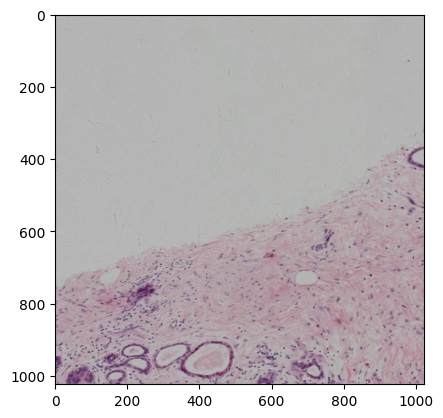

In [12]:
from torch import nn
import os
import torch 
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

path_HE = 'C:/Users/phili/OneDrive/Uni/WS_22/Masterarbeit/Masterarbeit_Code_Philipp_Rosin/Data_set_BCI_challange/train/HE_imgs/HE'
path_IHC = 'C:/Users/phili/OneDrive/Uni/WS_22/Masterarbeit/Masterarbeit_Code_Philipp_Rosin/Data_set_BCI_challange/train/IHC_imgs/IHC'

patch_size = 512
size = patch_size
stride = patch_size
lst = os.listdir(path_IHC)
img_names = lst

HE_img_path = os.path.join(path_HE, img_names[10])
IHC_img_path = os.path.join(path_IHC, img_names[1])




def load_image_to_tensor(img_path):
    pil_img = Image.open(img_path)
    img_arr = np.array(pil_img)
    # type conversion
    img_arr = img_arr.astype(np.float32)
    # rearange dims for tensor 
    img_arr = np.transpose(img_arr, axes=[2,0,1])

    # get tensor 
    img_tensor = torch.tensor(img_arr)

    img_tensor = img_tensor.cuda()
    return img_tensor

img = load_image_to_tensor(HE_img_path)

import matplotlib.pyplot as plt
def display_image(images):
  images_np = images.cpu().numpy()
  images_np = images_np.transpose(1,2,0)
  images_np = images_np.astype(np.uint8)

  plt.imshow(images_np)

display_image(img)
